# Importing Libraries and checking data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("C:\\Users\\rohit\\OneDrive\\Desktop\\Codsoft 2\\Churn Prediction\\Churn_Modelling.csv")

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# EDA

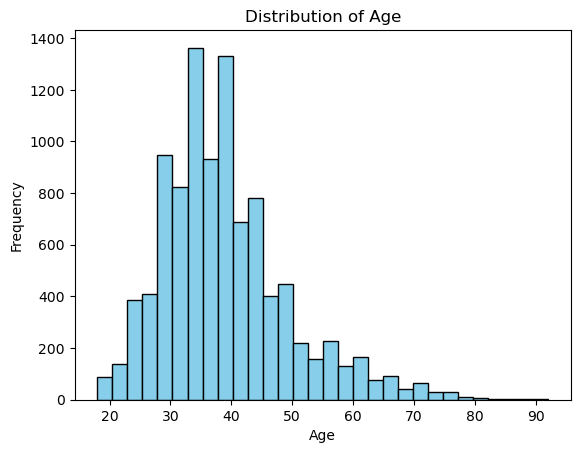

In [12]:
plt.hist(data['Age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

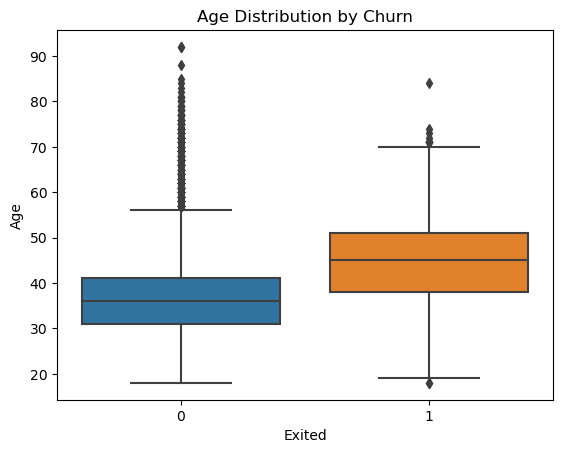

In [13]:
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Age Distribution by Churn')
plt.show()

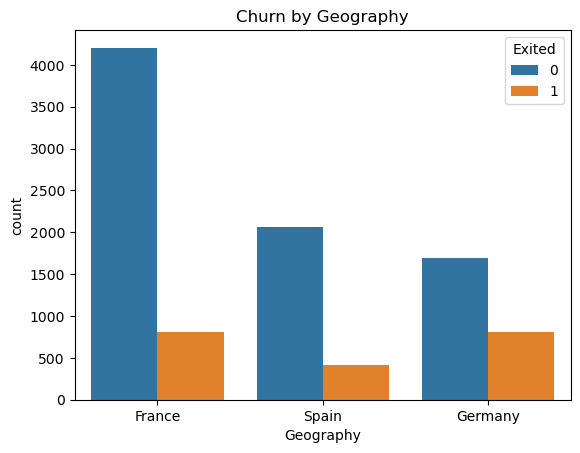

In [14]:
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Churn by Geography')
plt.show()

In [17]:
#Dropping cutomer ID and Name columns
data.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [20]:
#Converting geopgraphy and gender to numerical values.
from sklearn.preprocessing import LabelEncoder

#Initializing LabelEncoder
label_encoder = LabelEncoder()

#Encoding 'Geography' and 'Gender' columns
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])


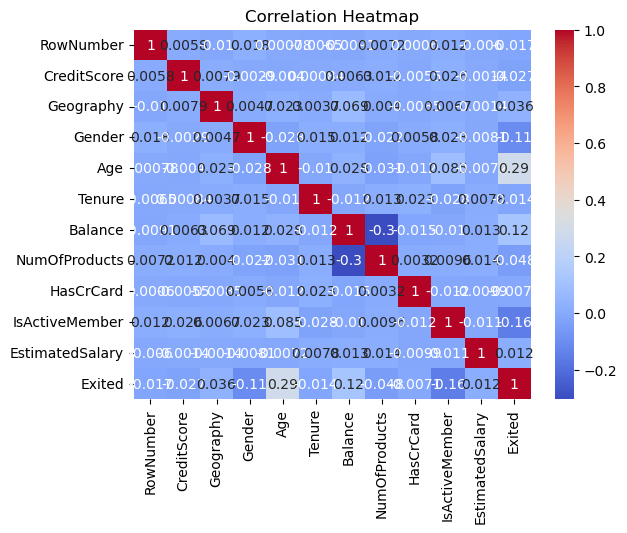

In [21]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

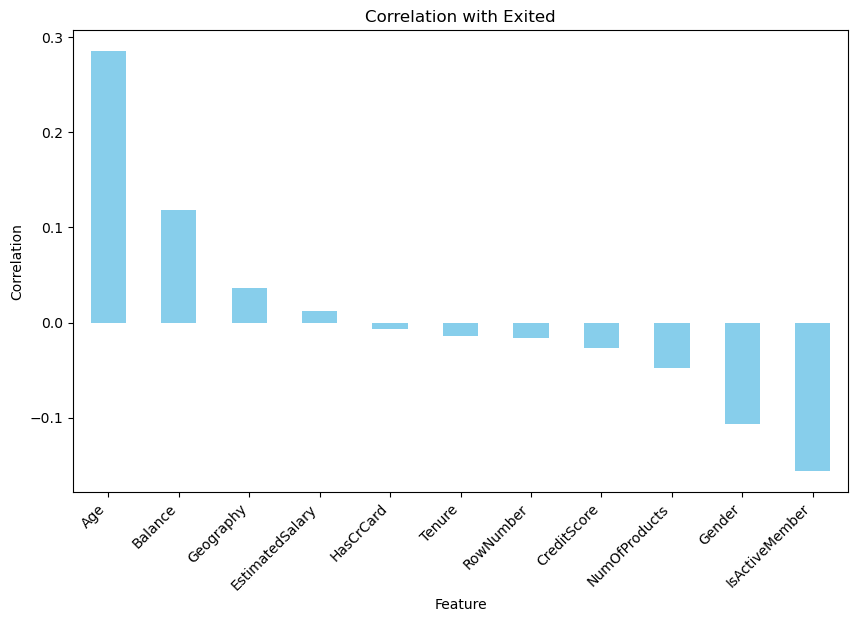

In [22]:
# Calculate correlation between 'Exited' and all other columns
correlation_with_exited = data.corr()['Exited'].sort_values(ascending=False)

# Plot correlation values
plt.figure(figsize=(10, 6))
correlation_with_exited.drop('Exited').plot(kind='bar', color='skyblue')
plt.title('Correlation with Exited')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


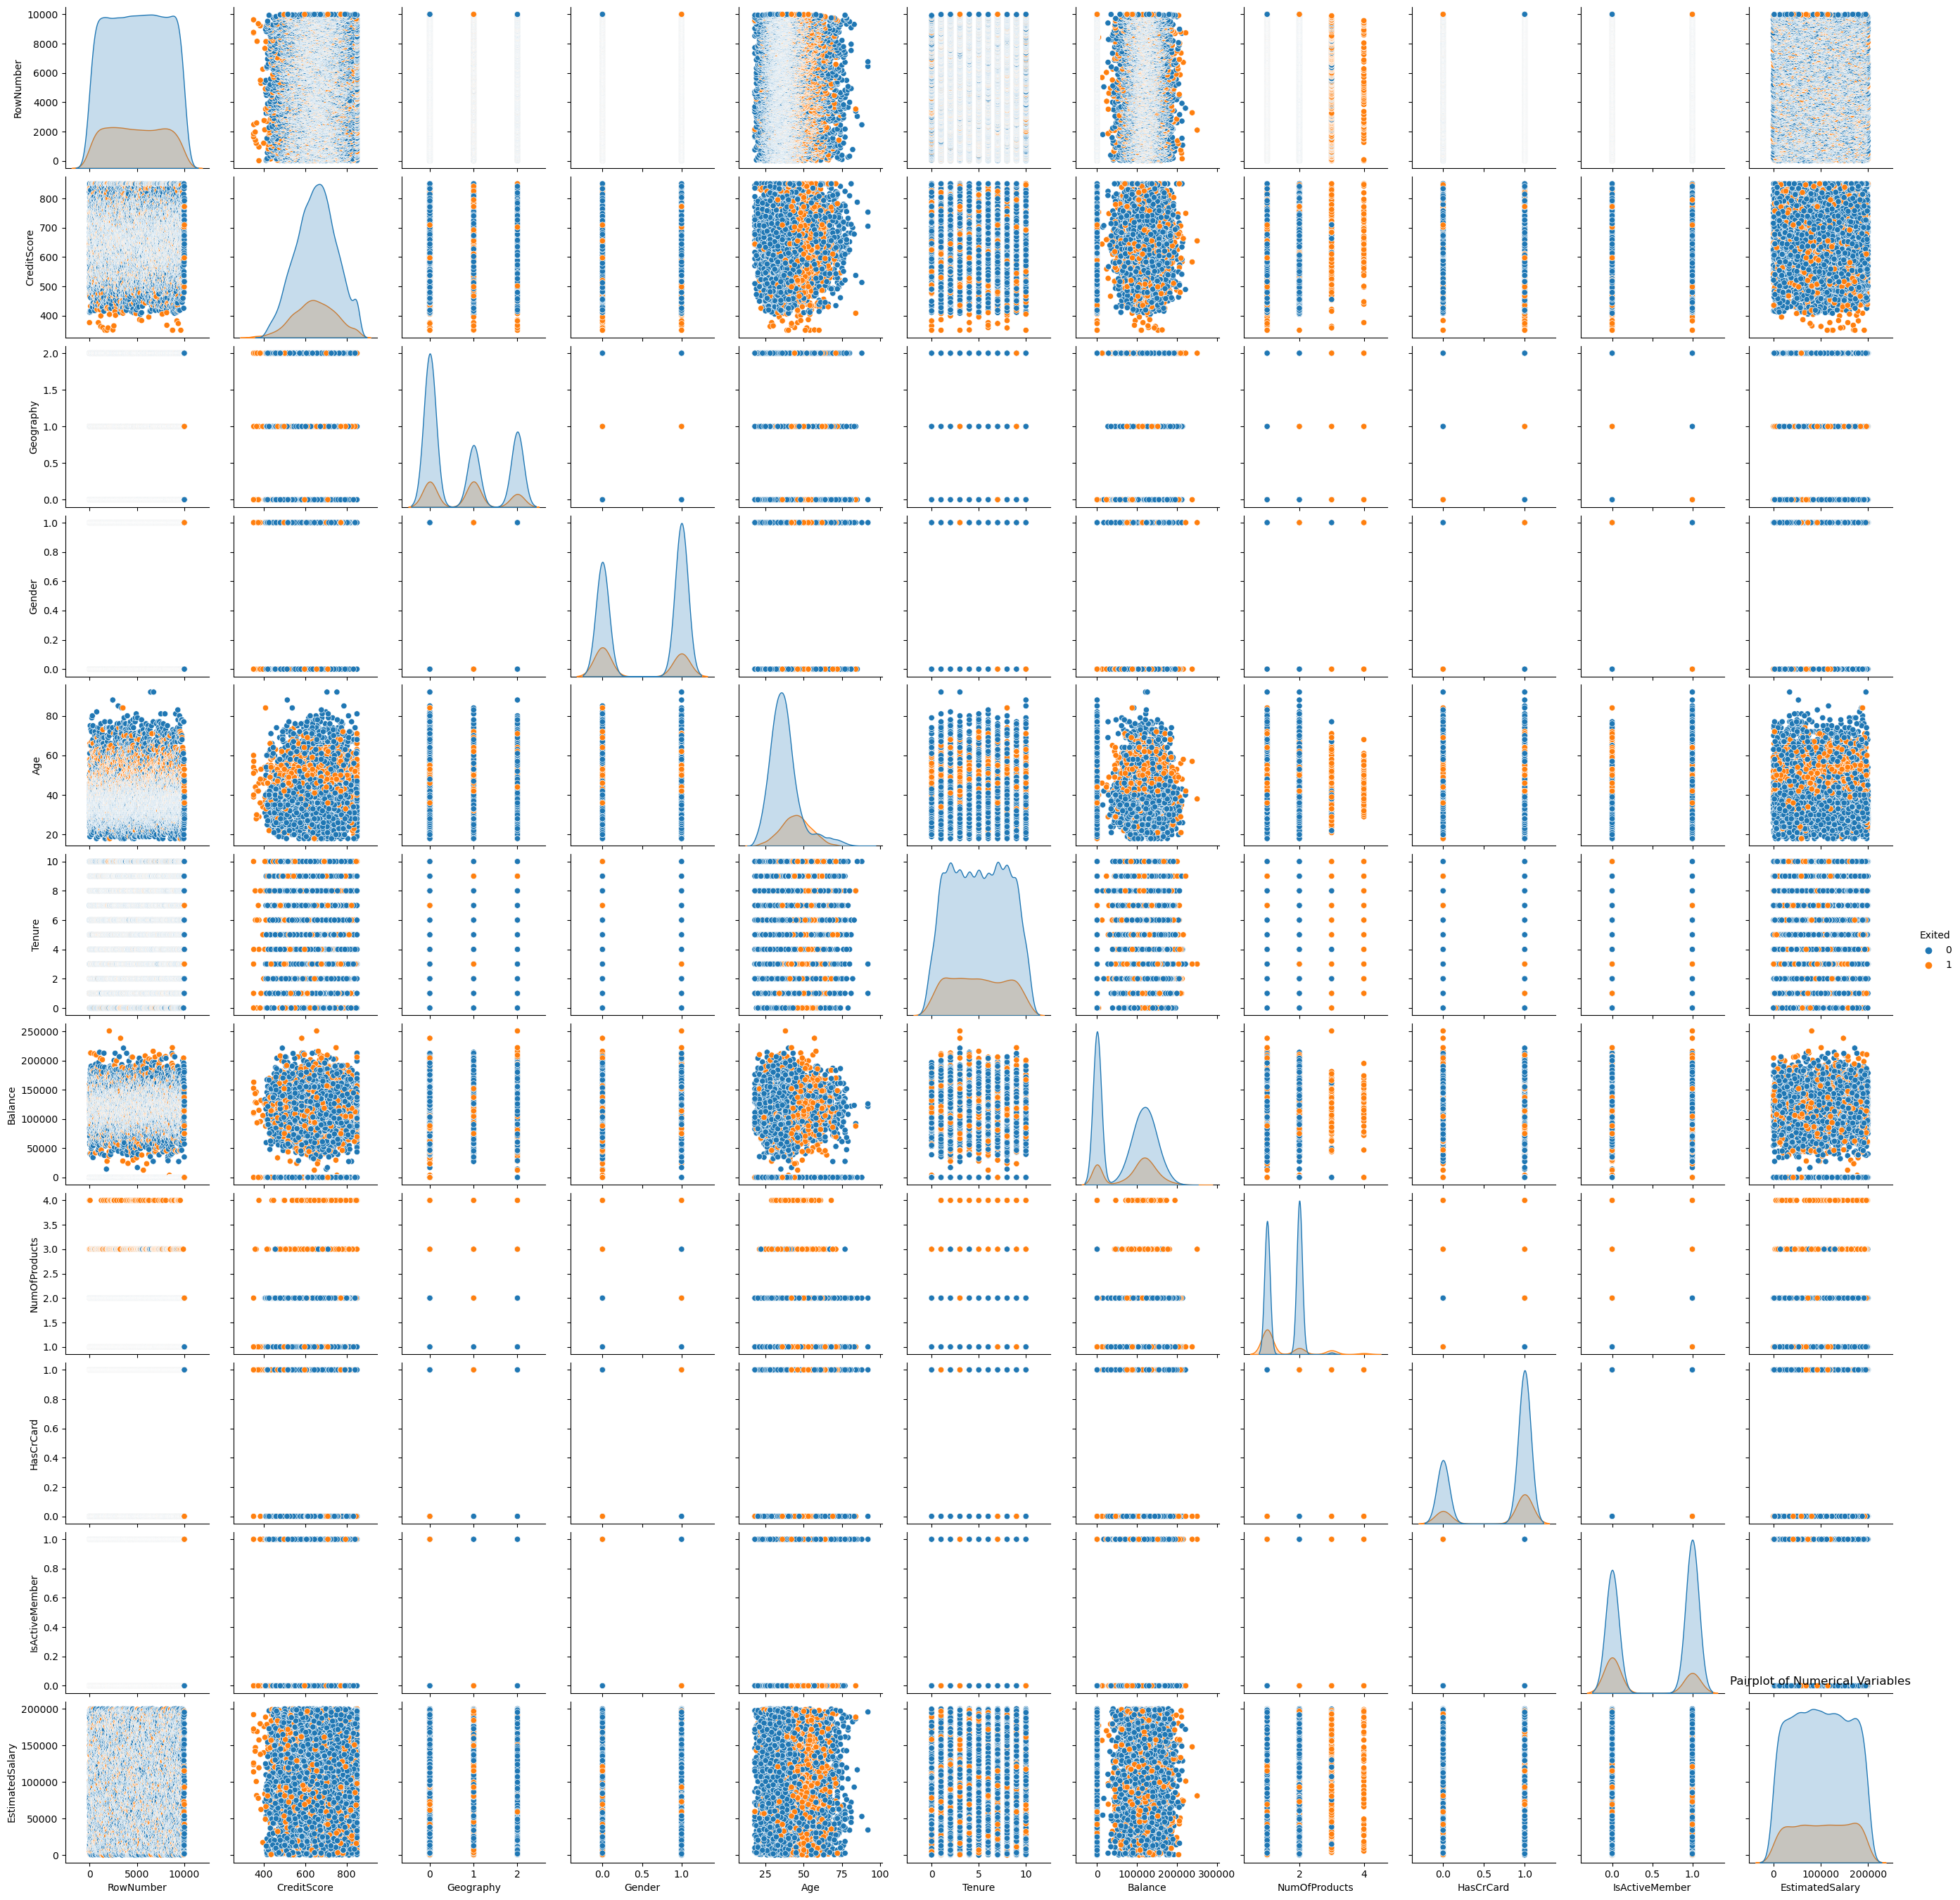

In [23]:
sns.pairplot(data, hue='Exited')
plt.title('Pairplot of Numerical Variables')
plt.show()


In [24]:
#Based on the above plots columns with little correlation to "Excited" are dropped. The 4 with least correlation to be precise
correlation_with_exited = data.corr()['Exited'].sort_values()
columns_to_drop = correlation_with_exited.index[:4]
data.drop(columns_to_drop, axis=1, inplace=True)

# Training the model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [29]:
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#We first try with Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

In [33]:
#Evaluating the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression:", accuracy_lr)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Accuracy of Logistic Regression: 0.8035

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#Now we try Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [35]:
#Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy of Random Forest: 0.8165

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1607
           1       0.57      0.28      0.38       393

    accuracy                           0.82      2000
   macro avg       0.70      0.62      0.64      2000
weighted avg       0.79      0.82      0.79      2000



In [36]:
#Finally we try Gradient Boosting
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)

In [37]:
#Evaluating the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting:", accuracy_gb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

Accuracy of Gradient Boosting: 0.822

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1607
           1       0.60      0.29      0.39       393

    accuracy                           0.82      2000
   macro avg       0.72      0.62      0.64      2000
weighted avg       0.80      0.82      0.80      2000



## Conclusion

In [38]:
#Comparing accuracies
if accuracy_lr > accuracy_rf and accuracy_lr > accuracy_gb:
    print("Logistic Regression has the highest accuracy:", accuracy_lr)
elif accuracy_rf > accuracy_lr and accuracy_rf > accuracy_gb:
    print("Random Forest has the highest accuracy:", accuracy_rf)
else:
    print("Gradient Boosting has the highest accuracy:", accuracy_gb)

Gradient Boosting has the highest accuracy: 0.822


Highest accuracy was provided by Gradient boosing.